# Importing Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
import seaborn as sns

# Load Dataset

In [32]:
data = pd.read_csv('/content/Ice Cream Sales - temperatures.csv')

In [33]:
data.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [34]:
data.shape

(365, 2)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        365 non-null    int64  
 1   Ice Cream Profits  365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


In [36]:
data.duplicated().sum()

1

In [37]:
data = data.drop_duplicates()

In [38]:
data.shape

(364, 2)

In [39]:
#checking for Null values
data.isnull().sum()

Temperature          0
Ice Cream Profits    0
dtype: int64

# Univariate Analysis

In [40]:
data.columns

Index(['Temperature', 'Ice Cream Profits'], dtype='object')

<Axes: xlabel='Ice Cream Profits'>

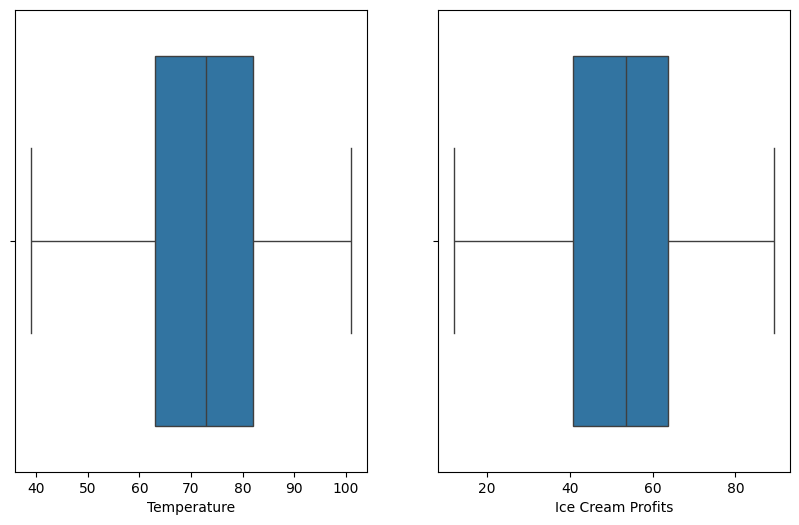

In [41]:
fig,axes = plt.subplots(1,2)
sns.boxplot(x = 'Temperature',data = data,ax = axes[0])
sns.boxplot(x = 'Ice Cream Profits',data = data,ax = axes[1])

# Bivariate Analysis

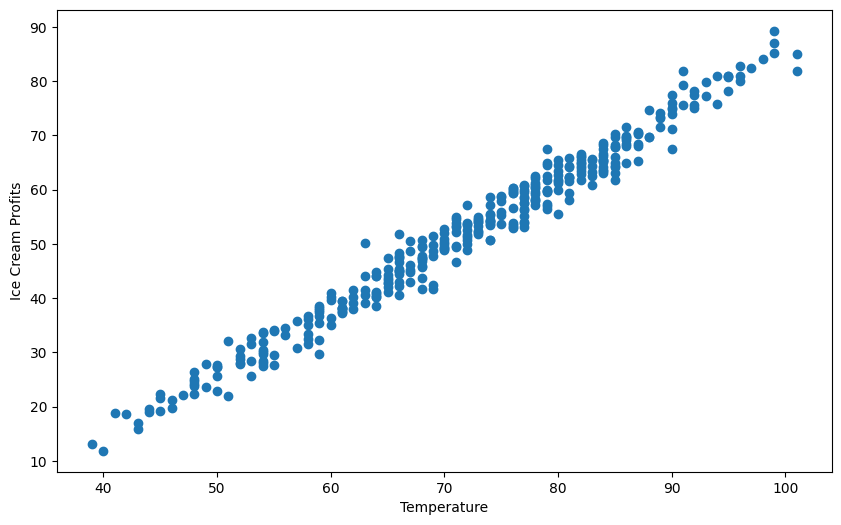

In [42]:
#Numerical - Numerical analysis
plt.scatter(x = 'Temperature', y = 'Ice Cream Profits', data = data)
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Profits')
plt.show()

Result:- As Temperature increases, Ice Cream Profits also increases.

<Axes: xlabel='Temperature', ylabel='Count'>

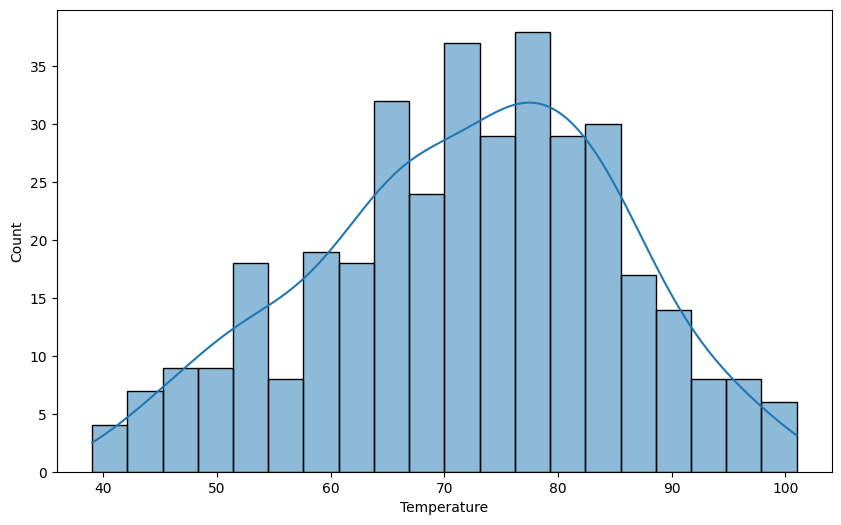

In [44]:
#checking distribution
sns.histplot(x = 'Temperature',data = data, kde = True,bins = 20)

It's likely to normal distribution.

# Data splitting to training and testing.

In [47]:
x = data.drop('Ice Cream Profits',axis = 1)
y = data['Ice Cream Profits']

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30)

In [51]:
x_train.shape,x_test.shape

((254, 1), (110, 1))

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [55]:
y_pred = model.predict(x_test)

In [56]:
y_pred

array([43.88740114, 58.09113601, 30.86731084, 30.86731084, 28.5000217 ,
       56.90749144, 55.72384687, 46.25469029, 46.25469029, 48.62197943,
       58.09113601, 39.15282285, 75.84580461, 64.00935888, 67.5602926 ,
       48.62197943, 75.84580461, 47.43833486, 59.27478059, 49.80562401,
       26.13273255, 61.64206973, 53.35655772, 48.62197943, 60.45842516,
       64.00935888, 39.15282285, 45.07104571, 60.45842516, 39.15282285,
       61.64206973, 56.90749144, 36.78553371, 61.64206973, 28.5000217 ,
       64.00935888, 17.84722054, 62.82571431, 40.33646742, 32.05095541,
       67.5602926 , 55.72384687, 30.86731084, 66.37664802, 74.66216003,
       59.27478059, 58.09113601, 66.37664802, 49.80562401, 42.70375657,
       73.47851546, 43.88740114, 67.5602926 , 82.94767204, 33.23459999,
       35.60188913, 37.96917828, 68.74393717, 62.82571431, 69.92758174,
       37.96917828, 17.84722054, 23.76544341, 71.11122632, 67.5602926 ,
       50.98926858, 68.74393717, 54.5402023 , 35.60188913, 54.54

In [59]:
from sklearn.metrics import mean_squared_error,r2_score


In [58]:
mean_squared_error(y_test,y_pred)

6.033437797805719

In [60]:
r2_score(y_test,y_pred)

0.9749277408376628

# Checking wheather Overfitting or not

In [61]:
#we got to know that test score is aprox 97%
y_pred_train = model.predict(x_train)

In [62]:
mean_squared_error(y_pred_train,y_train)

5.812815585904913

In [63]:
r2_score(y_train,y_pred_train)

0.9777081638609365

There is no case of Overfitting

Our model is doing well.